# This is featured in : http://www.monicapuerto.com/homicides-in-dc/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Downloaded crime data sets from opendata.dc.gov for 2017 and 2018 and appended them to each other

In [3]:
df2017 = pd.read_csv('2017DCCrime.csv',index_col=0)

In [4]:
df2017.drop(columns='Year',inplace=True)

In [5]:
df2018 = pd.read_csv('2018DCCrime.csv')

In [6]:
df2017.columns

Index(['NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT', 'offensegroup', 'LONGITUDE',
       'END_DATE', 'offense-text', 'SHIFT', 'YBLOCK', 'DISTRICT', 'WARD',
       'YEAR', 'offensekey', 'BID', 'sector', 'PSA', 'ucr-rank', 'BLOCK_GROUP',
       'VOTING_PRECINCT', 'XBLOCK', 'BLOCK', 'START_DATE', 'CCN', 'OFFENSE',
       'ANC', 'REPORT_DAT', 'METHOD', 'location', 'LATITUDE'],
      dtype='object')

In [7]:
df2018.columns

Index(['NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT', 'offensegroup', 'LONGITUDE',
       'END_DATE', 'offense-text', 'SHIFT', 'YBLOCK', 'DISTRICT', 'WARD',
       'YEAR', 'offensekey', 'BID', 'sector', 'PSA', 'ucr-rank', 'BLOCK_GROUP',
       'VOTING_PRECINCT', 'XBLOCK', 'BLOCK', 'START_DATE', 'CCN', 'OFFENSE',
       'ANC', 'REPORT_DAT', 'METHOD', 'location', 'LATITUDE'],
      dtype='object')

In [8]:
df = df2017.append(df2018).reset_index()

In [9]:
df.YEAR.unique()

array([2017, 2018])

#### Added a new column with month as a month so I can fiter YTD data for September. Pulled it on 9/20/2018 for 2018 data. Looked at homicide only data

In [10]:
df['month'] = pd.DatetimeIndex(df['START_DATE']).month

In [11]:
dfYTD = df[df['month'] <= 9]

In [12]:
dfYTD = dfYTD[dfYTD['offense-text'] == 'homicide']

## Summary:

### The method preferred for homicides are guns which that method alone has gone up 38% versus last year. The increase of gun related homicides in DC occured 96% of the time in Ward 8.

### The ward with the most crime increase is Ward 8 with 41% increase of homicide crime.

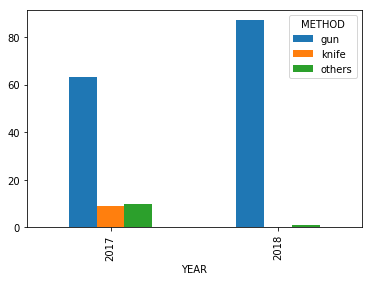

In [199]:
dfYTD.groupby('YEAR').METHOD.value_counts().unstack().plot.bar()
plt.savefig("Homicide_Methods.png")

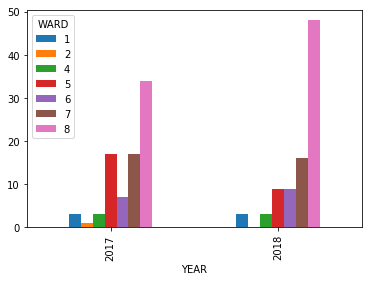

In [200]:
dfYTD.groupby('YEAR').WARD.value_counts().unstack().plot.bar()
plt.savefig("Homicide_WARDS.png")

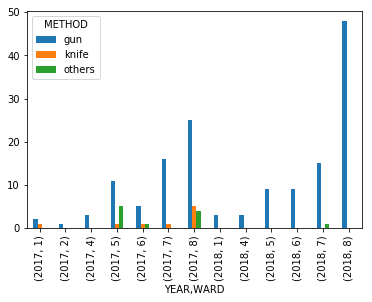

In [201]:
dfYTD.groupby(['YEAR','WARD']).METHOD.value_counts().unstack().plot.bar()
plt.savefig("Homicide_Methods_WARDS.png")

### Why is there so much crime in some Wards versus others? What are some features of these divisions in the district that have a high correlation with crime incidents?

#### There might have been a better way to do this , but I wanted to merge to the Wards document as 'wards' , the homicide counts by year which comes from the dfYTD data frame.

In [16]:
wards = pd.read_csv('Ward_from_2012.csv')

In [114]:
YEARS_series = dfYTD.YEAR

In [115]:
WARDS_series = dfYTD.WARD

In [118]:
WARDS2_df = pd.concat([YEARS_series,WARDS_series],axis=1)

In [122]:
WARDS2_df['homicide-freq'] = WARDS2_df.groupby(['YEAR','WARD']).transform('count')

In [126]:
WARDS2_df.drop_duplicates(keep='first',inplace=True)

In [131]:
WARDS2_df.reset_index(inplace=True)

In [136]:
WARDS2_df.drop(columns='index',inplace=True)

In [205]:
WARDS2_df.tail()

,YEAR,WARD,homicide-freq
8,2018,8,48
9,2018,6,9
10,2018,1,3
11,2018,5,9
12,2018,4,3


### Added homicide frequency to the Wards past 2 years

In [139]:
wards_with_homicides = wards.merge(WARDS2_df,left_on='WARD', right_on='WARD',how='left')

### There is 1 null for Year and homicide because Ward 3 had 0 homicides, need to add a 2017 row and a 2018 row, since this is a small data set I just exported the data and added it myself in Excel

In [150]:
wards_with_homicides.isnull().sum().tail(2)

YEAR             1
homicide-freq    1
dtype: int64

In [151]:
wards_with_homicides.to_csv('wards_with_homicides.csv')

In [152]:
wards_homicides = pd.read_csv('wards_with_homicidesv2.csv')

In [173]:
wards_homicides.head(1)

,OBJECTID,WARD,NAME,REP_NAME,WEB_URL,REP_PHONE,REP_EMAIL,REP_OFFICE,WARD_ID,LABEL,...,NO_DIPLOMA_25_PLUS,DIPLOMA_25_PLUS,NO_DEGREE_25_PLUS,ASSOC_DEGREE_25_PLUS,BACH_DEGREE_25_PLUS,MED_VAL_OOU,Shape_Length0,Shape_Area0,YEAR,homicide-freq
0,1,8,Ward 8,"Trayon White, Sr.",http://dccouncil.us/council/trayon-white-sr,(202) 724-8045,twhite@dccouncil.us,"1350 Pennsylvania Ave, Suite 400, NW 20004",8,Ward 8,...,5958,18736,10975,2149,3781,229900,28714.06943,30965852.46,2017,34


In [196]:
corr = wards_homicides.iloc[:,49:].corr()

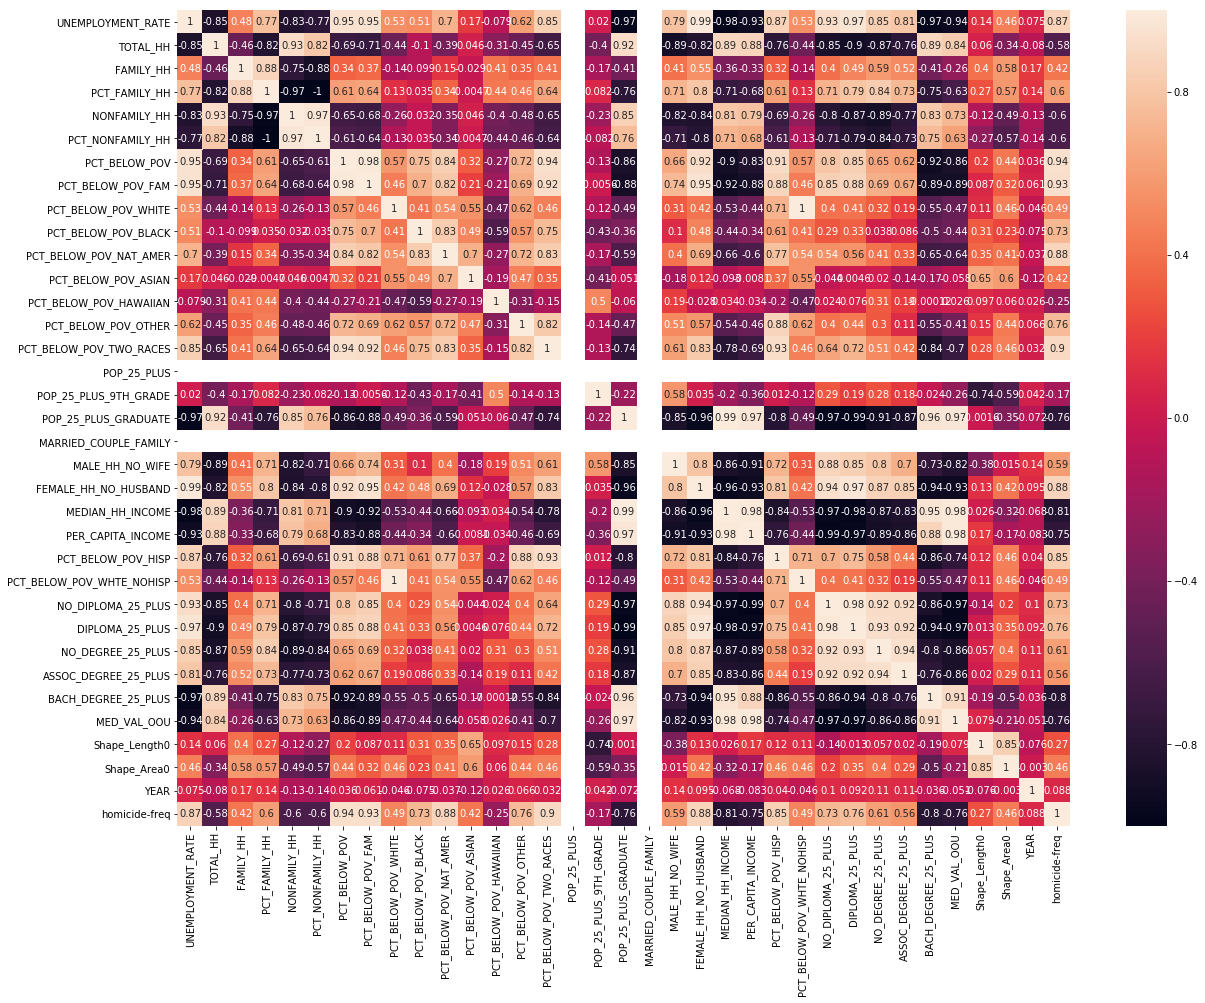

In [202]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.savefig("CORR.png")